Produce Pareto Front
Analyze the performance of cycles previously identified training the agent.

This Jupyter Notebook allows to export a text file with all the data to produce a Pareto front by evaluating the deterministic policies. It allows to view the training curves and to evaluate the performance of individual or collections of trainings (outputting the average reward, power, dissipation and efficiency). It also saves the corresponding deterministic actions and the corresponding state 
#### Import modules

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
import numpy as np
import plotting
import extra
import sac_tri

from importlib import reload
reload(extra);
reload(sac_tri);

## Produce Pareto-front txt file from the deterministic Policy
Produces a txt file with all the data to plot the Pareto front by evaluating the _deterministic_ policies learned during training. It does this by evaluating the performance of all trainings contained in the folder ```main_dir```, such that the parameters in ```parameters.txt``` satisfy the conditions in ```conditions_dict``` (see next cell for an example). If ```conditions_dict``` is left empty, all folders are evaluated. The Pareto front data is exported to ```main_dir``` as ```det_pareto.txt```. The evaluation of the _deterministic_ policy is performed doing ```24000``` steps on the environment and exponentially averaging the reward, the power, and the negative entropy production with ```gamma=0.99993```. It further saves the deterministic policy and the correspond state inside the ```saved_policies``` folder of each training respectively as ```det_policy.txt``` and ```states.txt```.

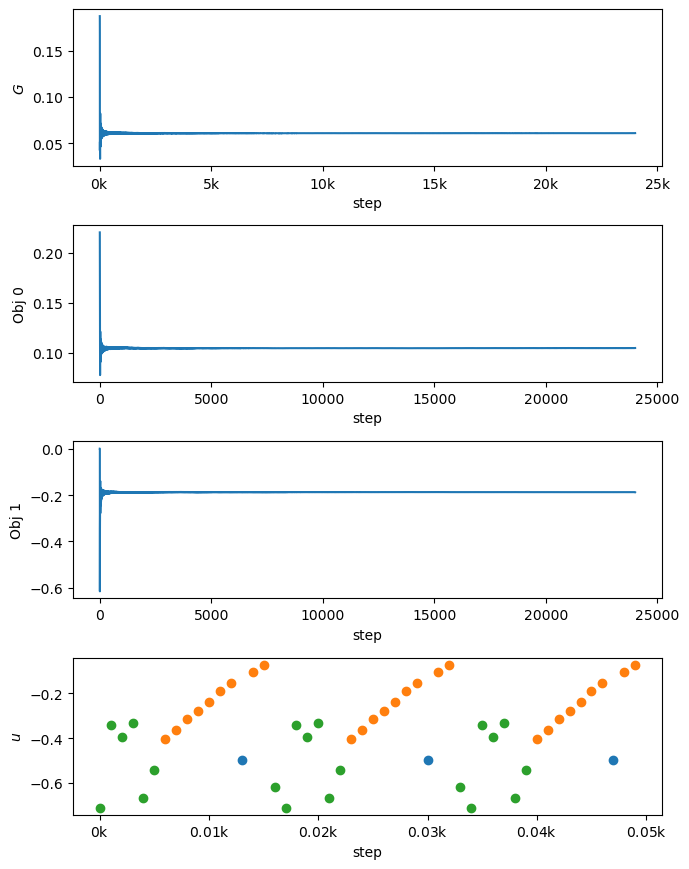

In [3]:
main_dir = "../important_data/7_pareto_two_qubit_resonant_counterrot/data/pareto/"
conditions_dict = {} #{"LR": "0.0003"} #{"a": "0.65"} 
save_state_to_file_name = "states.txt"

#used to evaluate the efficiency
def eff(power,diss):
    return np.abs(power/diss)

det_data_list = []
log_dirs = extra.log_dirs_given_criteria(main_dir, conditions_dict)
for (i, log_dir) in enumerate(log_dirs): 
    print(f"Evaluating i = {i+1} of {len(log_dirs)}")
    
    #load the data
    loaded_train = sac_tri.SacTrain()
    loaded_train.load_train(log_dir, no_train=True)
    
    #evaluate the model
    det_eval = loaded_train.evaluate_current_policy(deterministic=True, steps=24000, gamma=0.99993,actions_to_plot=50,
                    save_policy_to_file_name="det_policy.txt", save_state_to_file_name=save_state_to_file_name,
                    actions_ylim=None, suppress_show=False,dont_clear_output=False)
    
    #append data
    model_parameters = extra.params_from_log_dir(log_dir)
    a_val = model_parameters["a"]
    det_data_list.append([det_eval[1],det_eval[2], eff(det_eval[1],det_eval[2]), a_val, det_eval[0]])

#save the Pareto front txt file
np.savetxt(os.path.join(main_dir,"det_pareto.txt"), np.array(det_data_list, dtype=np.float32))


## Show training curves given some dict

In [ ]:
main_dir = "../data/my_data_folder"
conditions_dict = {} #{"A_END": "0.8"}

gamma = 0.99993
steps = 24000 

log_dirs = extra.log_dirs_given_criteria(main_dir, conditions_dict)
for (i, log_dir) in enumerate(log_dirs):
    #print directory and index
    print(f"i: {i}, log_dir: {log_dir}")
    
    #print last running rewards and their average
    last_rewards, avg_reward = extra.ret_last_rewards_and_avg(log_dir,number_of_rewards=6)
    print(f"Last rewards: {last_rewards}")
    print(f"Avg reward: {avg_reward}")
    
    #show the training plots
    plotting.plot_sac_logs(log_dir,is_tri=True,plot_to_file_line=None,actions_per_log=1000,
      suppress_show=False,save_plot=False,actions_ylim=None,actions_to_plot=100,dont_clear_output=True)
    
    #break line
    print("")